<a href="https://colab.research.google.com/github/Anushka-2906/DAI-101/blob/main/23114008_Anushka_Jangid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Anushka-2906/DAI-101/refs/heads/main/Titanic-Dataset.csv'
df = pd.read_csv(url)

# Display first few rows
df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

1.DATA CLEANING

In [31]:

#  Load the dataset
file_path = 'titanic.csv'  # Or path to your file on Google Drive
df = pd.read_csv(file_path)

#  **1. Inspect the Data**
print("\n" + "="*30 + " DATASET INFO " + "="*30)
print(df.info())
print("="*70)

#  **2. Handle Missing Values**
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("\n Missing values handled:")
print(f"- Age filled with median value: {df['Age'].median()}")
print(f"- Embarked filled with mode value: {df['Embarked'].mode()[0]}")
print("="*70)

#  **3. Remove Duplicates**
initial_shape = df.shape
df.drop_duplicates(inplace=True)
new_shape = df.shape

print("\n Duplicates removed:")
print(f"- Initial shape: {initial_shape}")
print(f"- After removing duplicates: {new_shape}")
print("="*70)

#  **4. Treat Outliers using IQR (for Fare)**
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

before_outliers = df.shape[0]
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]
after_outliers = df.shape[0]

print("\n Outliers treated:")
print(f"- Fare lower bound: {lower_bound:.2f}")
print(f"- Fare upper bound: {upper_bound:.2f}")
print(f"- Rows before removing outliers: {before_outliers}")
print(f"- Rows after removing outliers: {after_outliers}")
print("="*70)

#  **5. Standardize Categorical Values**
df['Sex'] = df['Sex'].str.lower()
df['Embarked'] = df['Embarked'].replace({
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
})

print("\n Categorical values standardized:")
print(f"- Unique values in 'Sex': {df['Sex'].unique()}")
print(f"- Unique values in 'Embarked': {df['Embarked'].unique()}")
print("="*70)

#  **6. Display Cleaned Data**
print("\n" + "="*30 + " CLEANED DATA (Top 5 Rows) " + "="*30)
print(df.head())
print("="*70)



============================== DATASET INFO ==============================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

 Missing values handled:
- Age filled with median value: 28.0
- Embarked filled with mode value: S

 Duplicates removed:
- Initial shape: (891, 12)
- After removi

 2. EXPLORATORY DATA ANALYSIS (EDA):

 Univariate Analysis (Single-Variable Exploration)


============================== SUMMARY STATISTICS ==============================
          count       mean        std   min      25%      50%   75%       max  \
survived  891.0   0.383838   0.486592  0.00   0.0000   0.0000   1.0    1.0000   
pclass    891.0   2.308642   0.836071  1.00   2.0000   3.0000   3.0    3.0000   
age       714.0  29.699118  14.526497  0.42  20.1250  28.0000  38.0   80.0000   
sibsp     891.0   0.523008   1.102743  0.00   0.0000   0.0000   1.0    8.0000   
parch     891.0   0.381594   0.806057  0.00   0.0000   0.0000   0.0    6.0000   
fare      891.0  32.204208  49.693429  0.00   7.9104  14.4542  31.0  512.3292   

           median     variance  skewness  mode  
survived   0.0000     0.236772  0.478523     0  
pclass     3.0000     0.699015 -0.630548     3  
age       28.0000   211.019125  0.389108  24.0  
sibsp      0.0000     1.216043  3.695352     0  
parch      0.0000     0.649728  2.749117     0  
fare      14.4542  2469.436846  4.787317  8.05  


<ipython-input-43-3726e5821a17>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


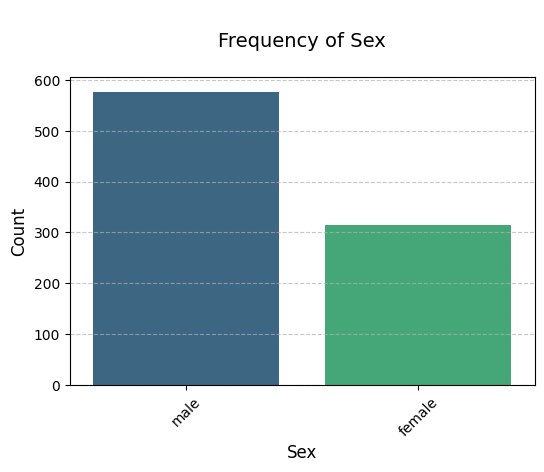

<ipython-input-43-3726e5821a17>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


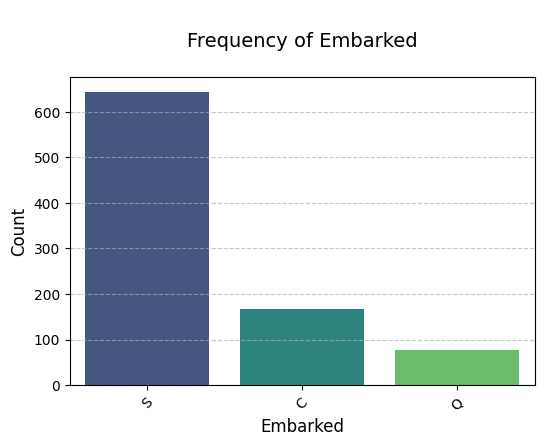

<ipython-input-43-3726e5821a17>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


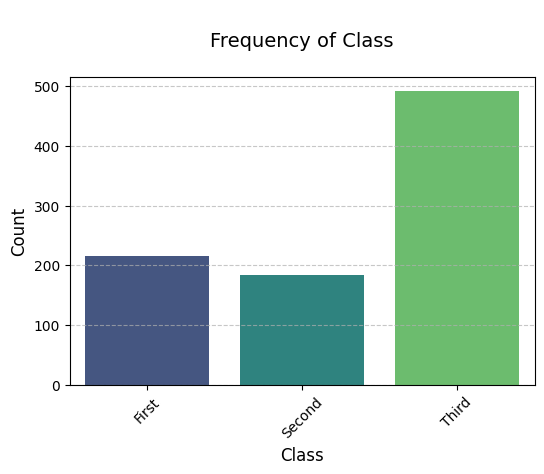

<ipython-input-43-3726e5821a17>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


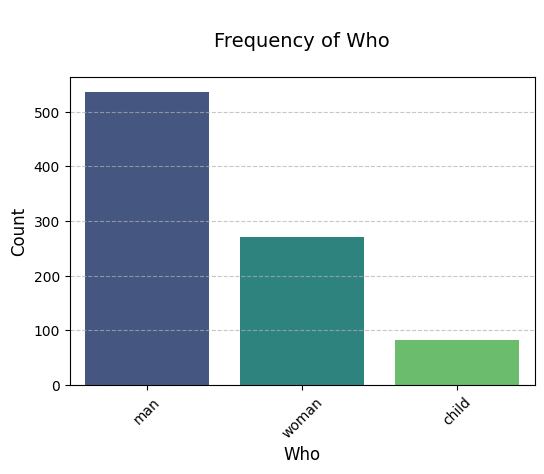

<ipython-input-43-3726e5821a17>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


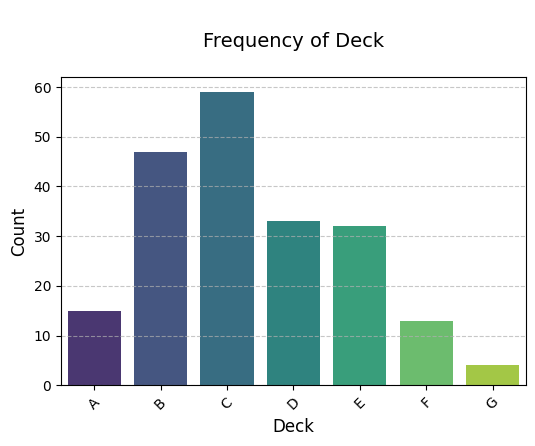

<ipython-input-43-3726e5821a17>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


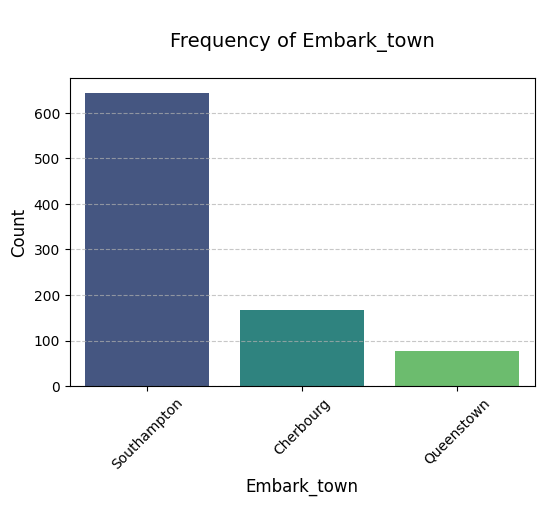

<ipython-input-43-3726e5821a17>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


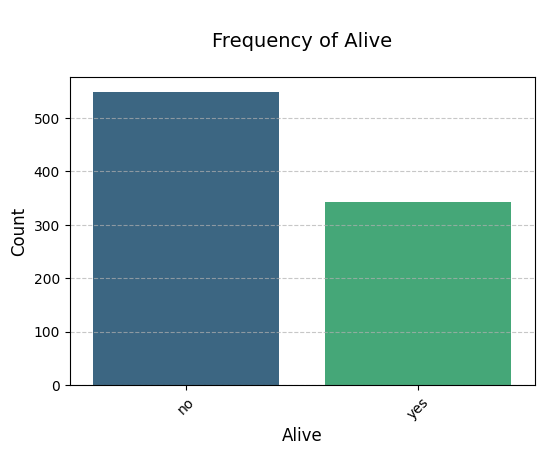

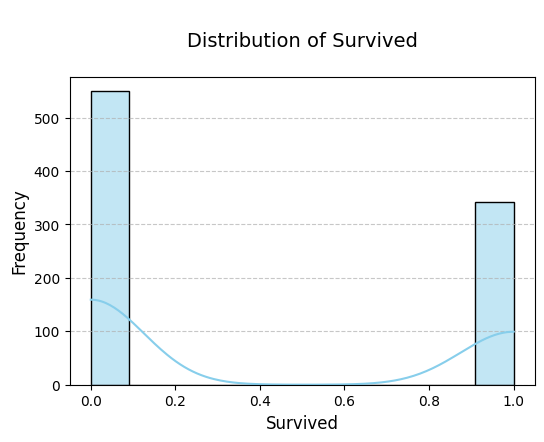

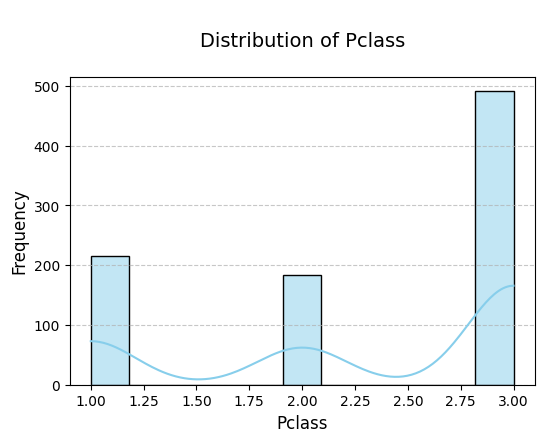

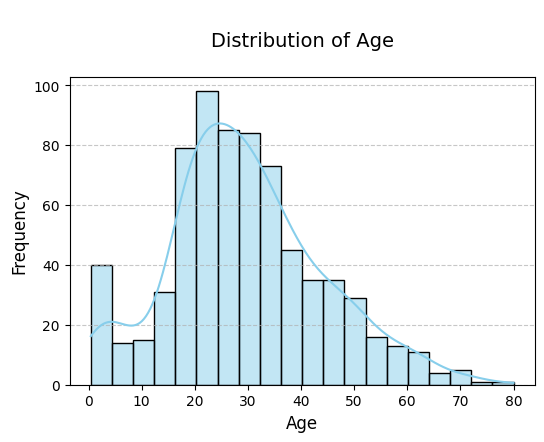

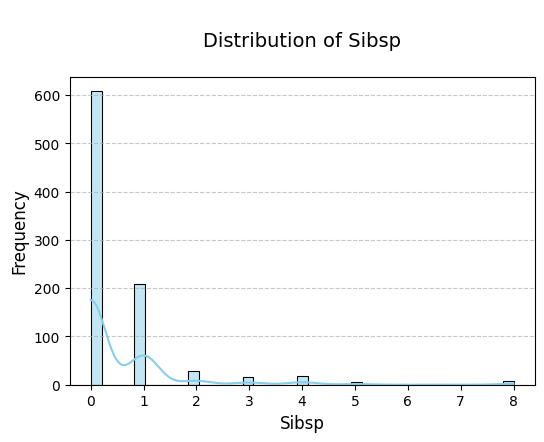

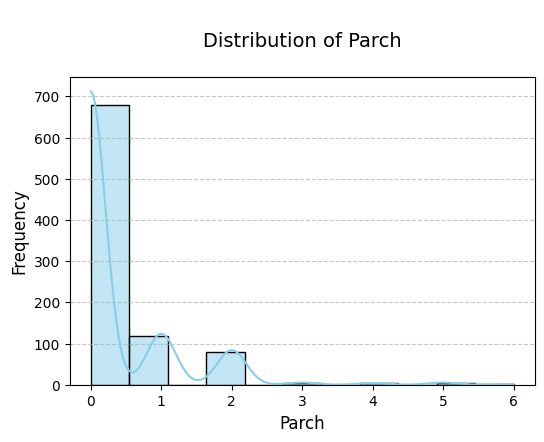

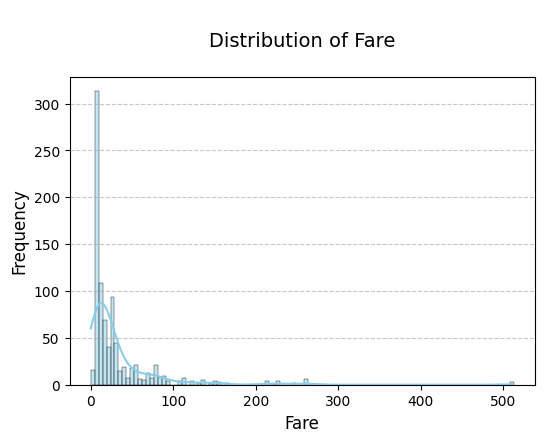

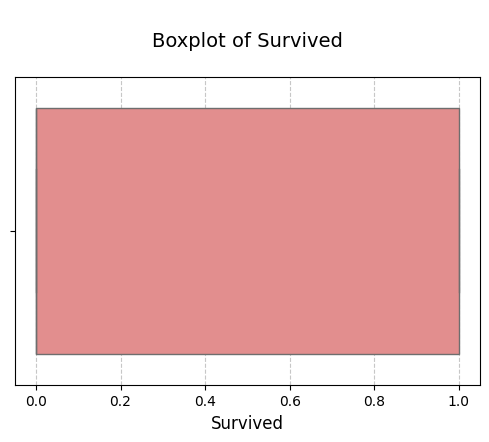

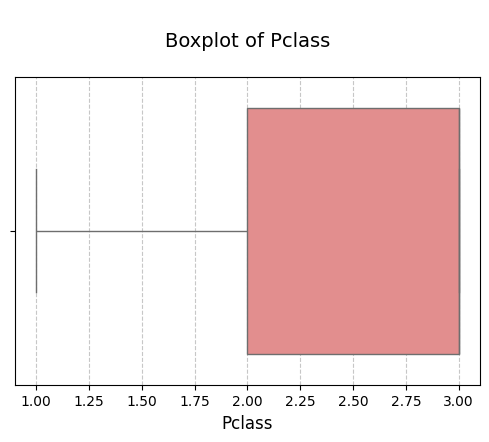

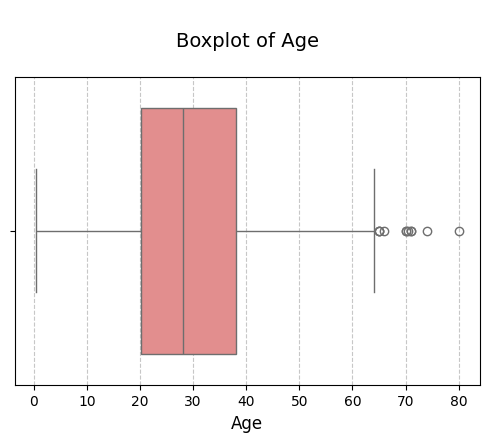

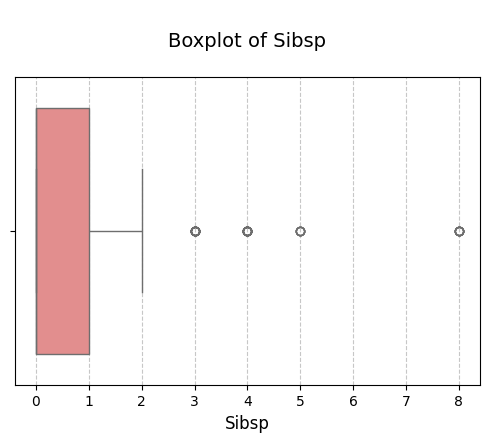

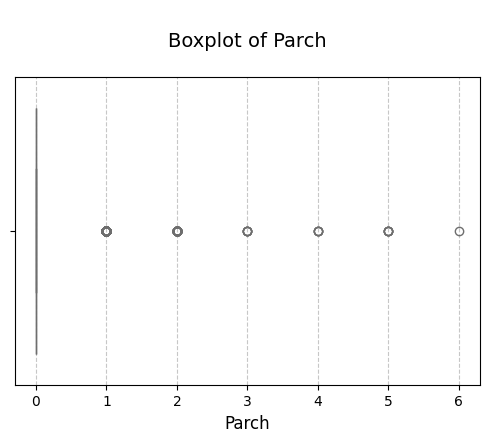

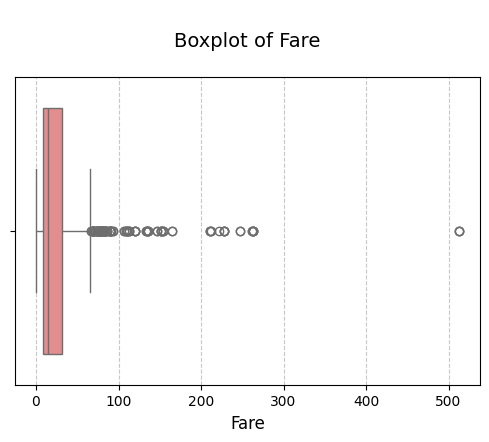

In [43]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset from seaborn (replace with your dataset if needed)
df = sns.load_dataset('titanic')

# ===================================================
# 1. Summary Statistics
# ===================================================
# Descriptive statistics (mean, median, mode, variance, skewness, etc.)
summary = df.describe().T

# Median, variance, and skewness only for numeric columns
numeric_cols = df.select_dtypes(include=['float', 'int']).columns
summary['median'] = df[numeric_cols].median()
summary['variance'] = df[numeric_cols].var()
summary['skewness'] = df[numeric_cols].skew()

# Mode can work for both numeric and categorical columns
summary['mode'] = df.mode().iloc[0]

print("\n" + "="*30 + " SUMMARY STATISTICS " + "="*30)
print(summary)
print("="*70)

# ===================================================
# 2. Frequency Distribution for Categorical Variables
# ===================================================
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_cols = [col for col in cat_cols if df[col].nunique() < 20]  # Drop high-cardinality columns

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'\nFrequency of {col.capitalize()}\n', fontsize=14)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# ===================================================
# 3. Histograms and Box Plots for Numerical Attributes
# ===================================================
# Histograms
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'\nDistribution of {col.capitalize()}\n', fontsize=14)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Box Plots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'\nBoxplot of {col.capitalize()}\n', fontsize=14)
    plt.xlabel(col.capitalize(), fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


 Bivariate Analysis (Two-Variable Exploration)

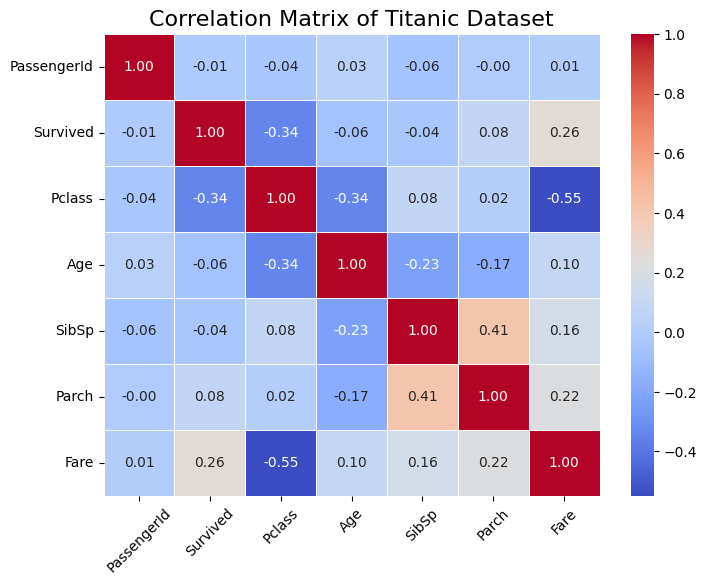

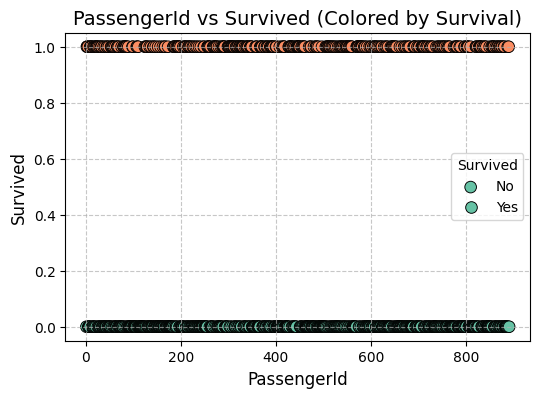

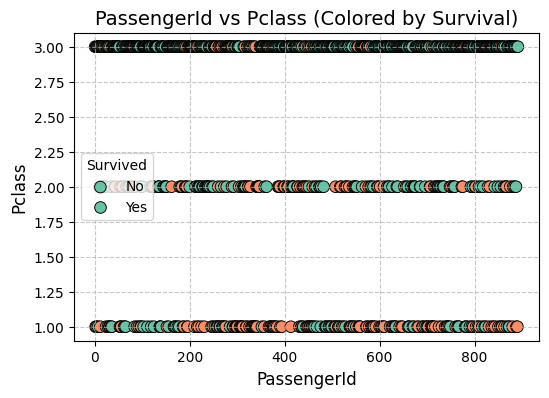

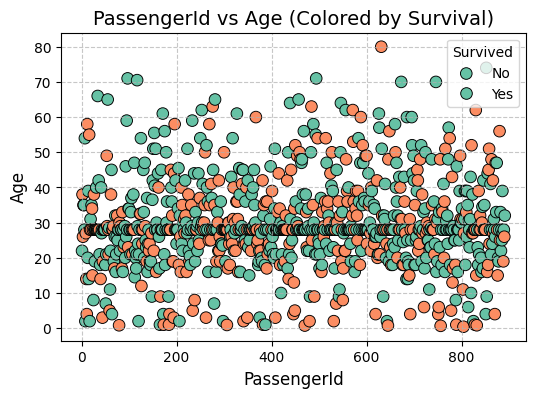

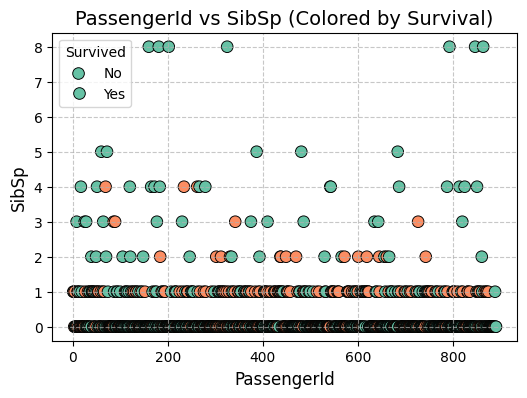

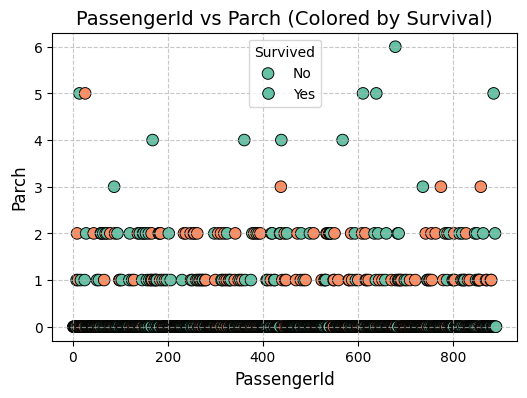

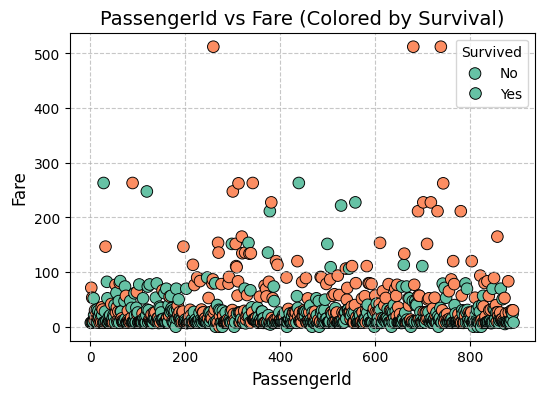

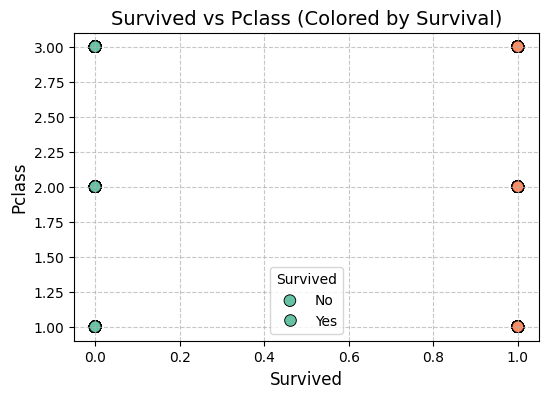

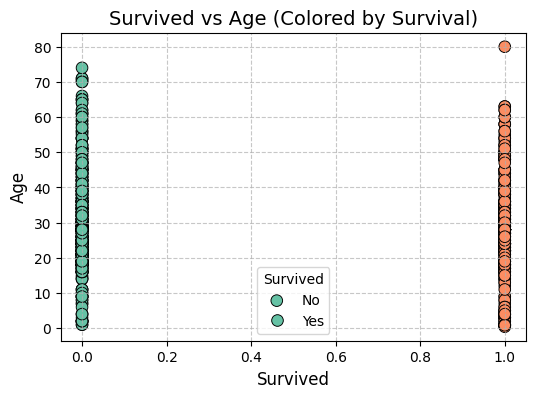

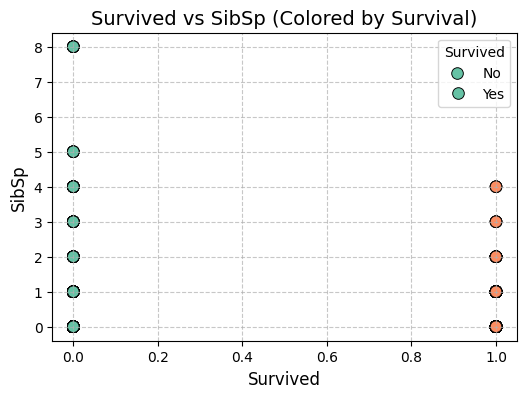

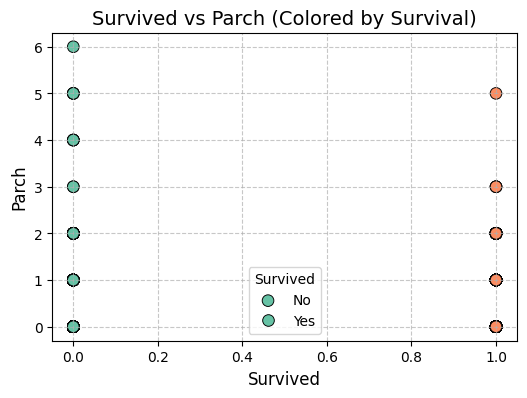

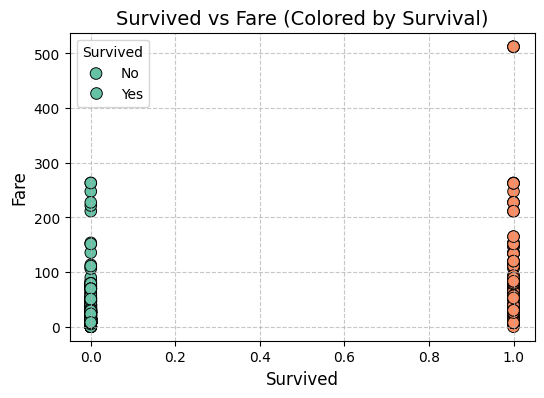

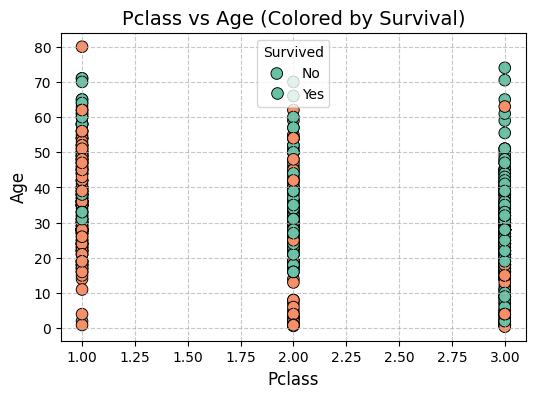

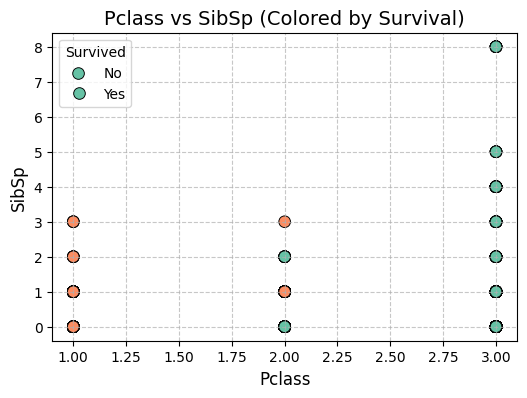

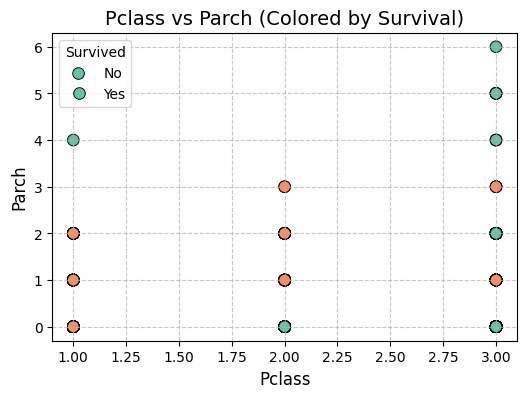

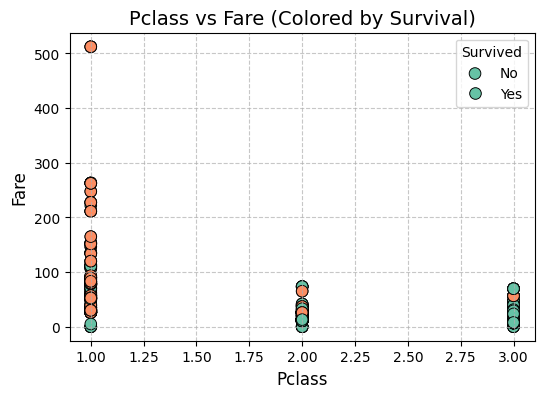

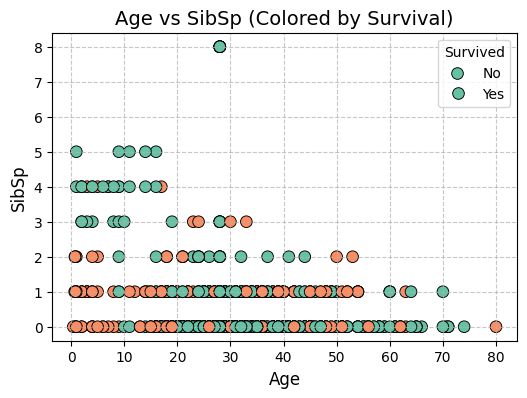

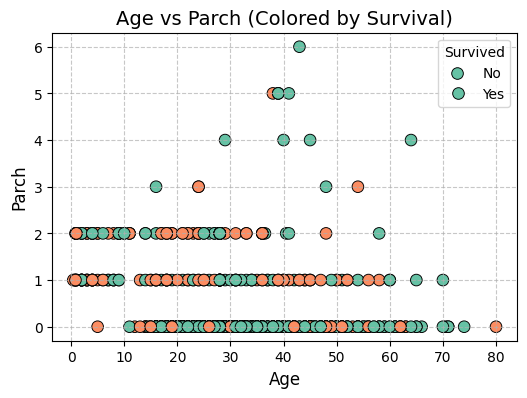

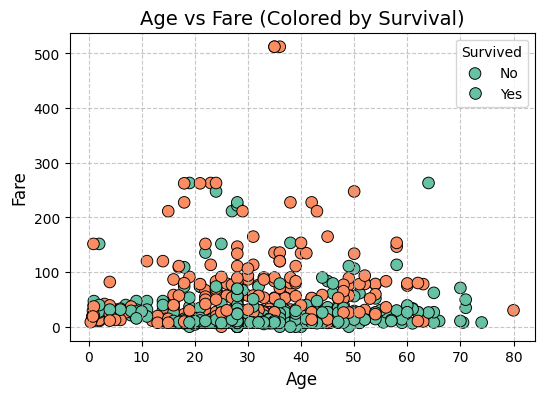

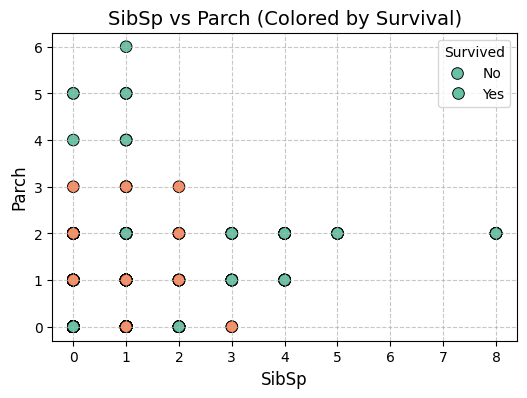

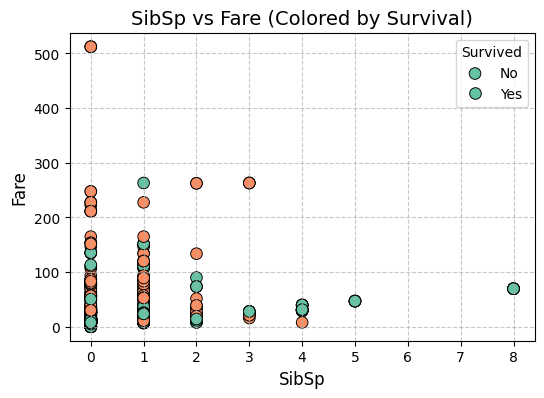

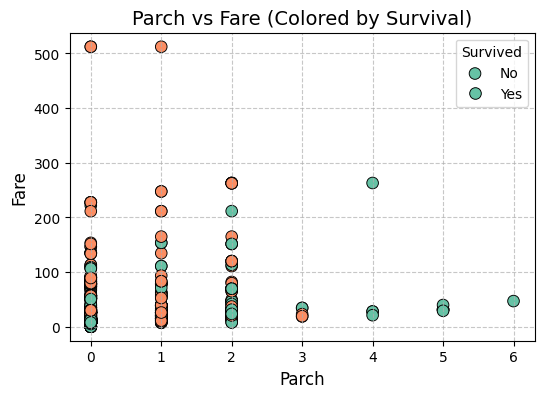

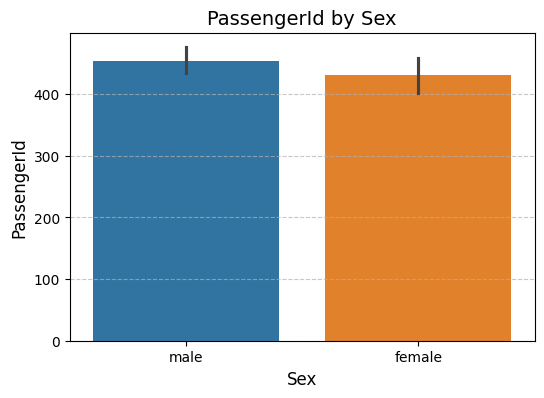

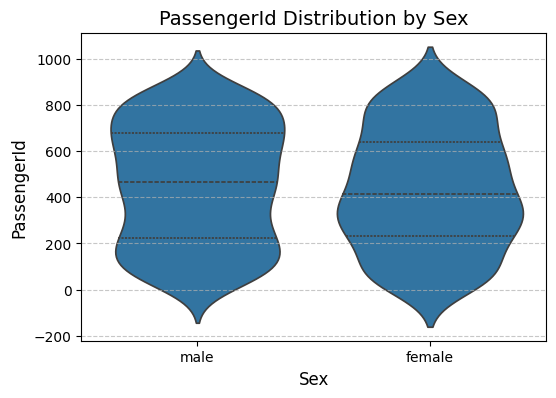

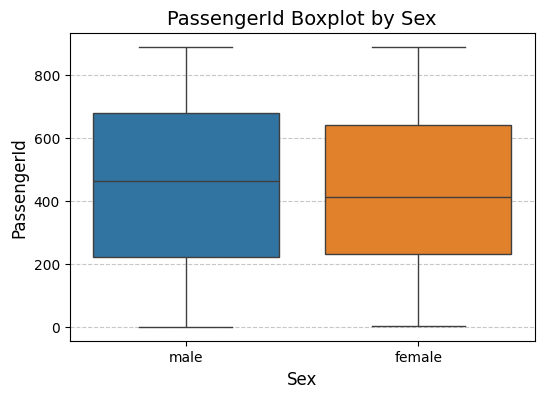

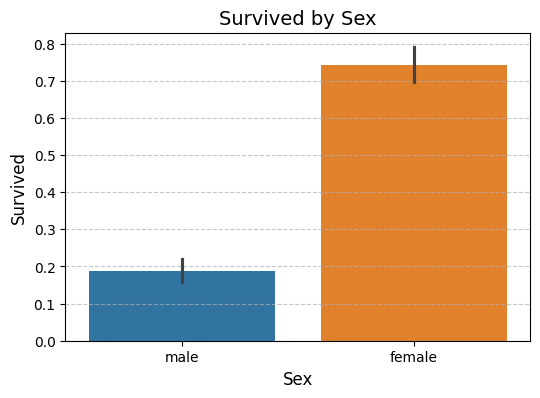

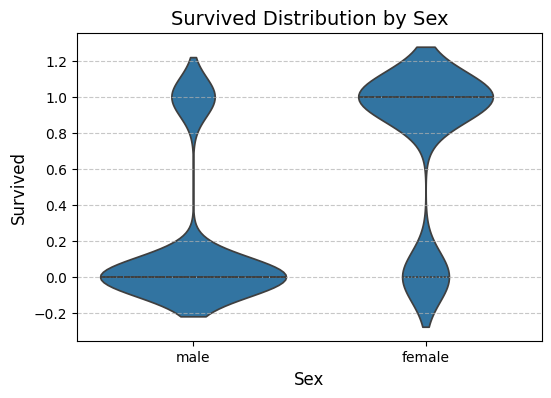

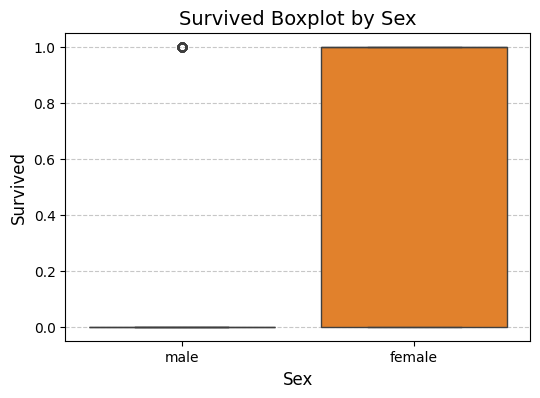

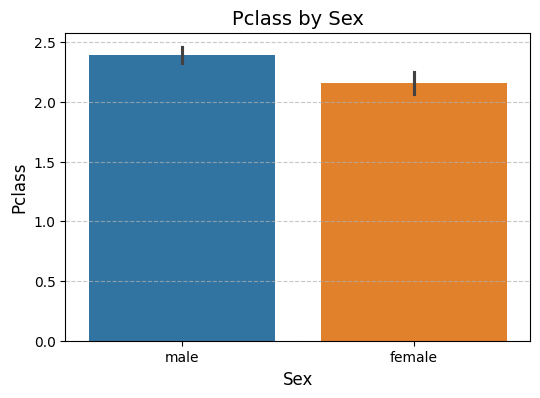

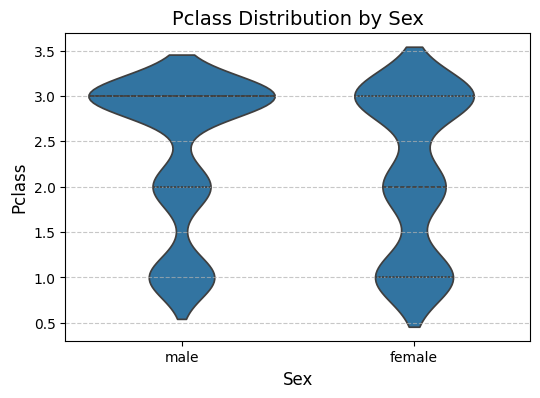

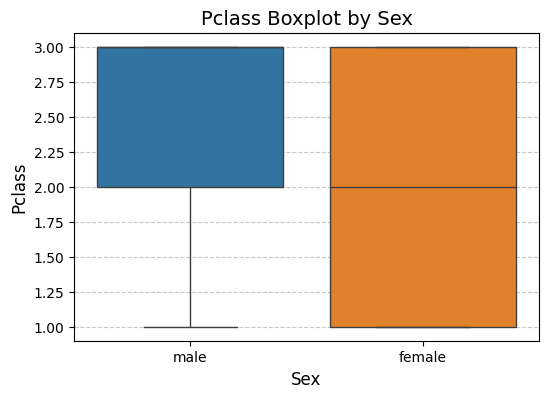

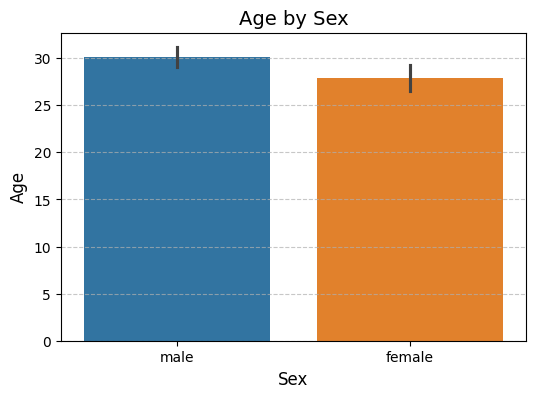

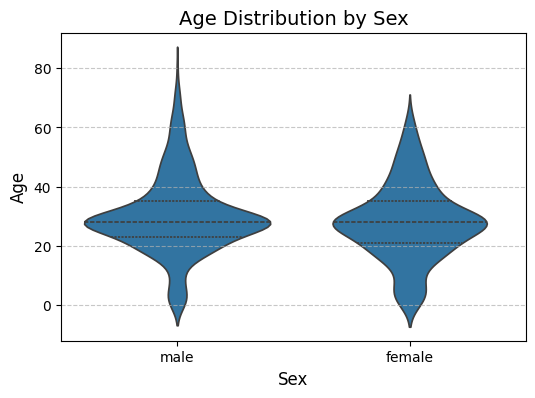

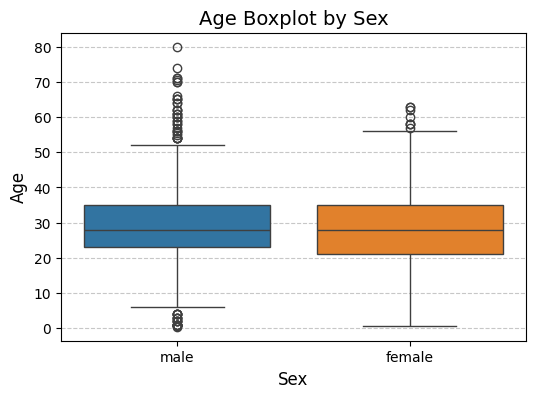

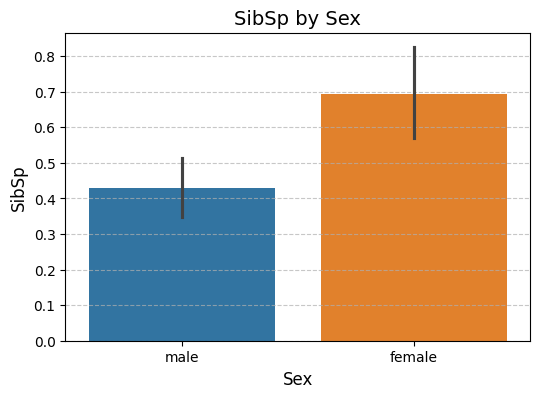

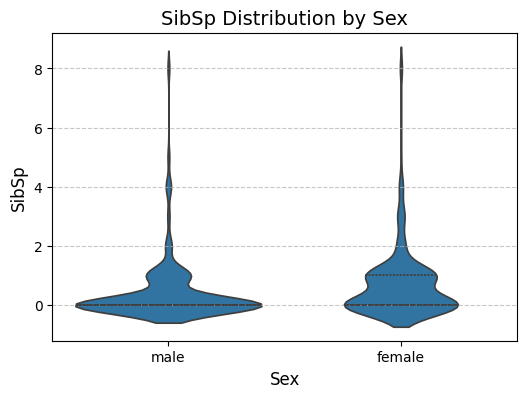

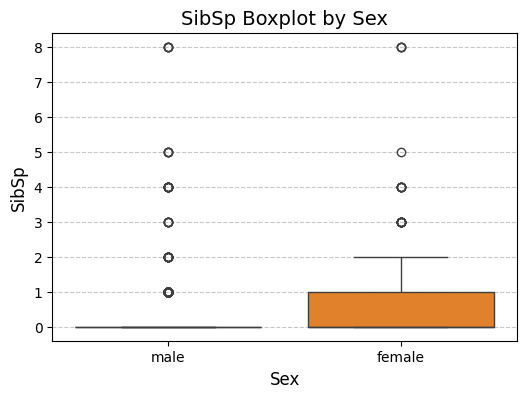

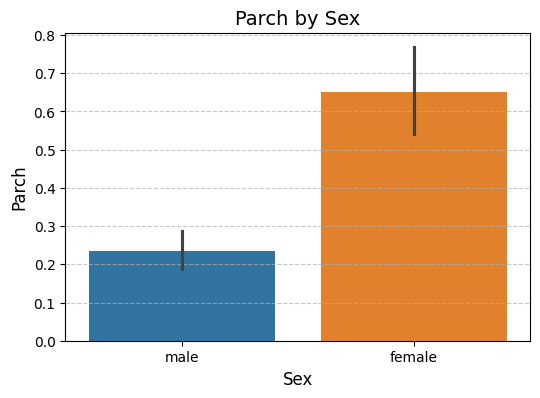

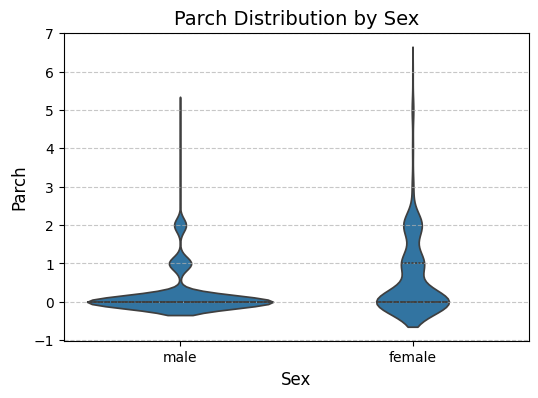

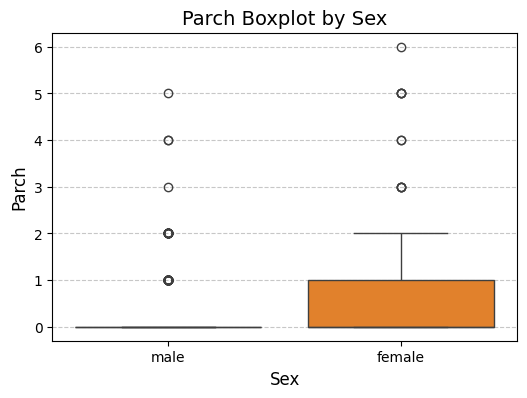

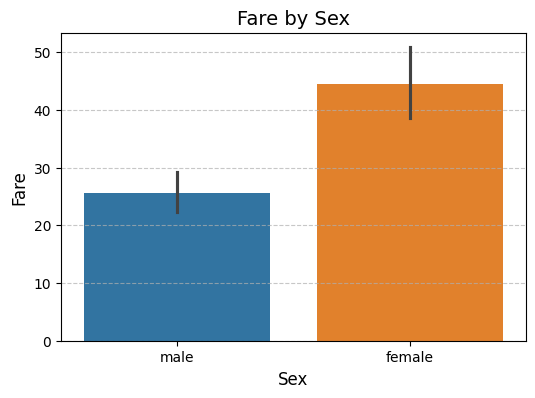

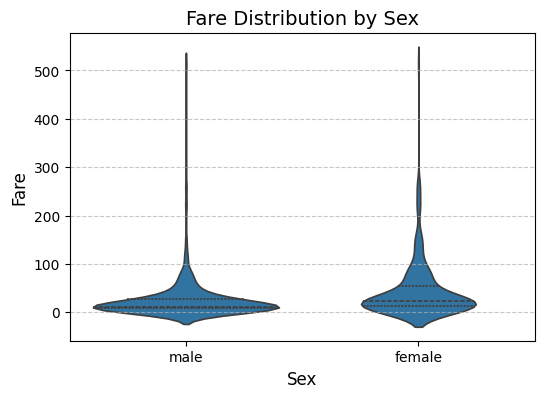

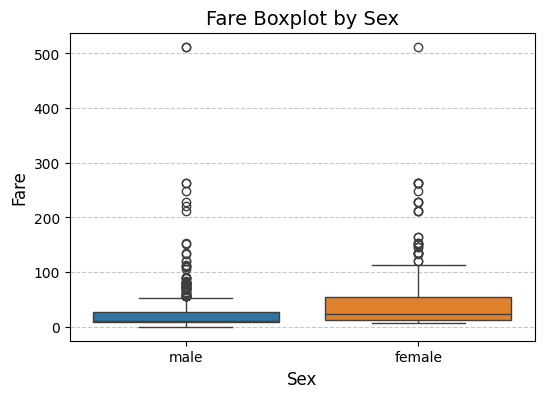

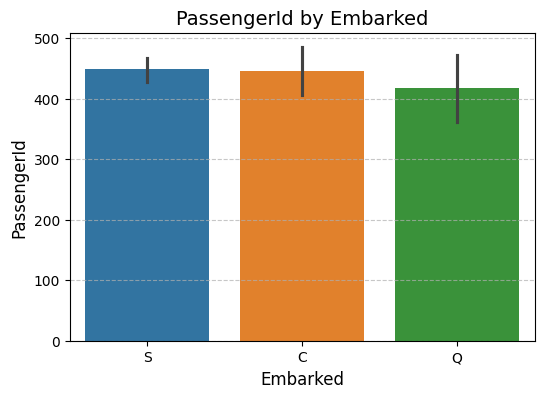

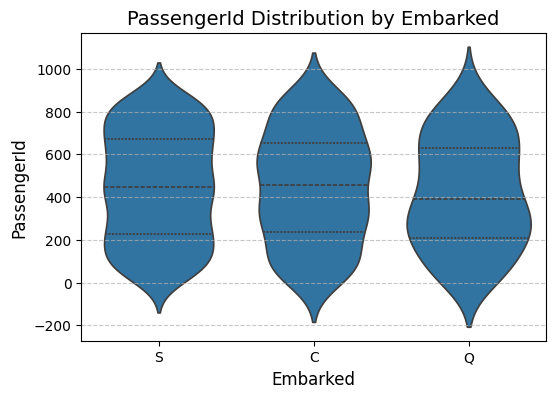

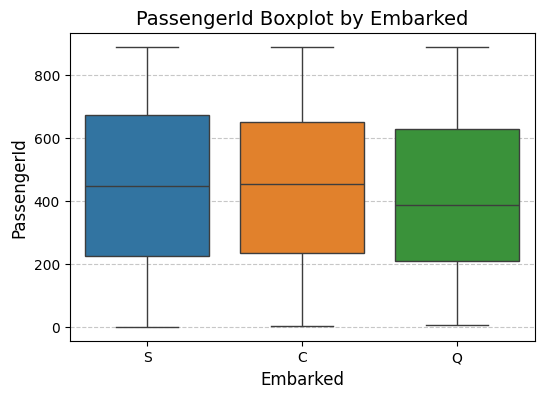

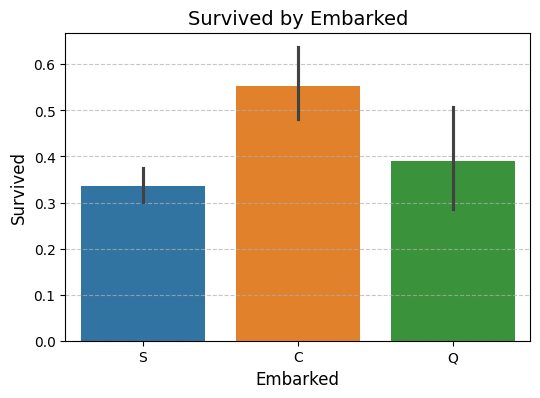

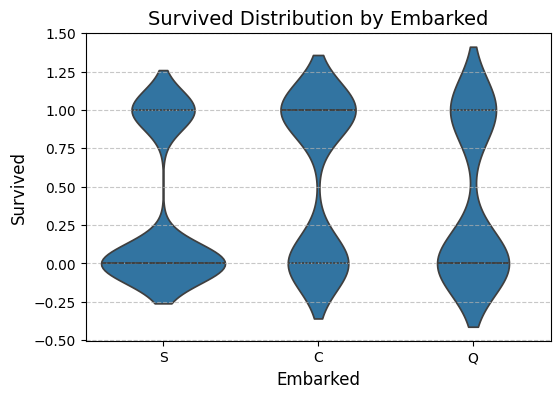

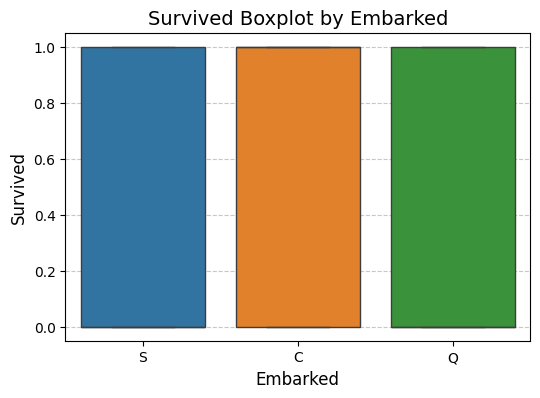

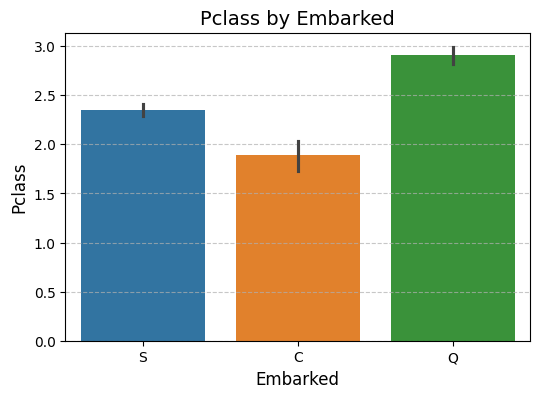

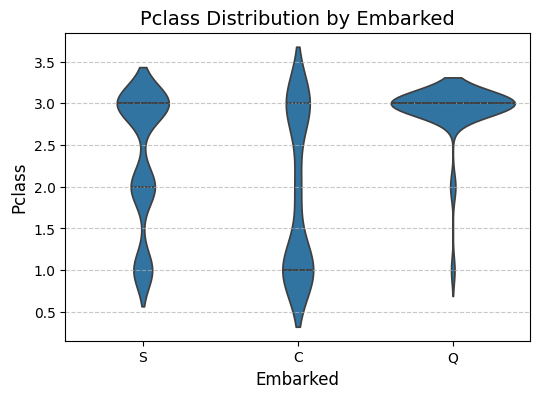

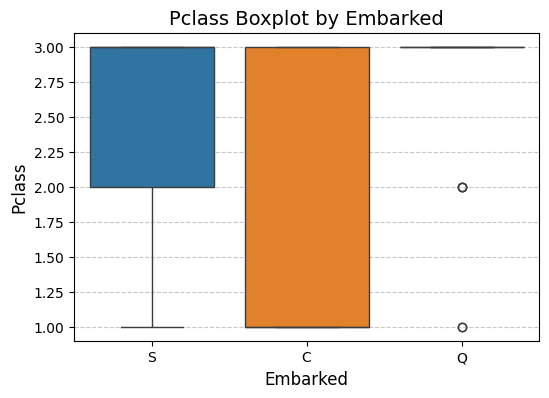

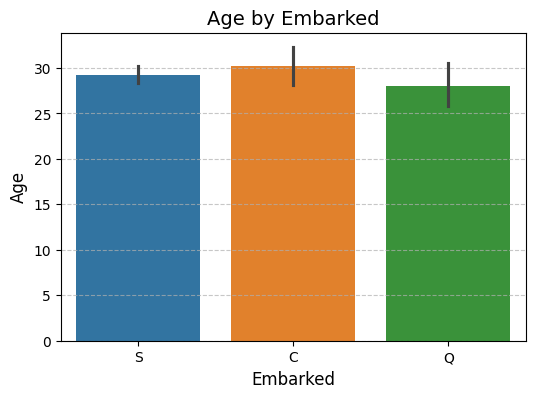

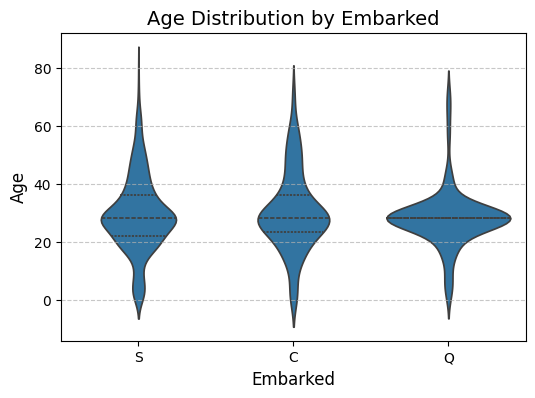

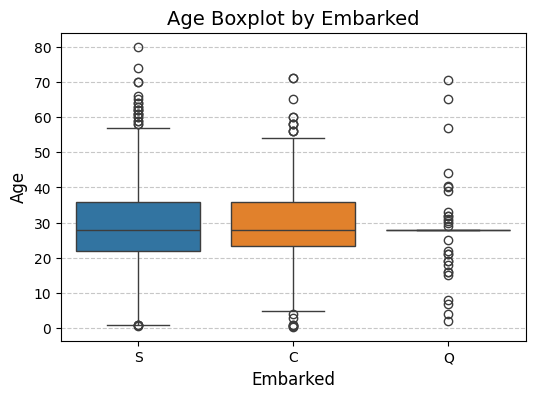

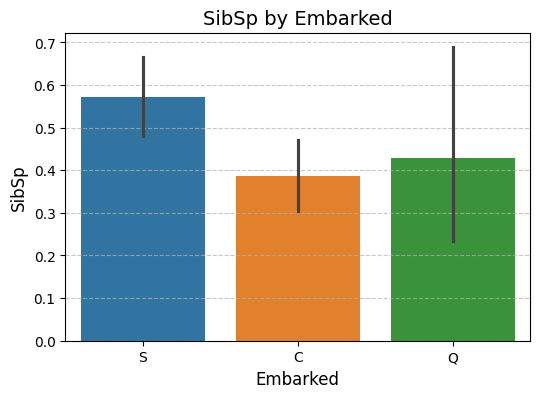

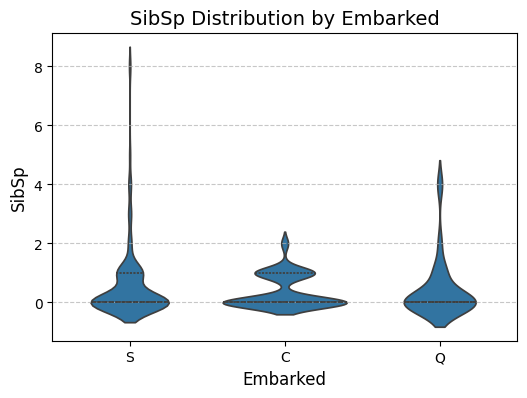

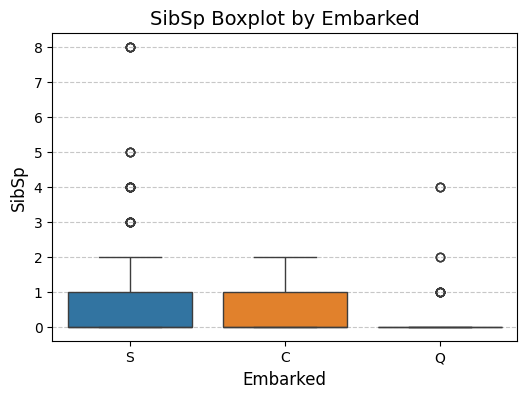

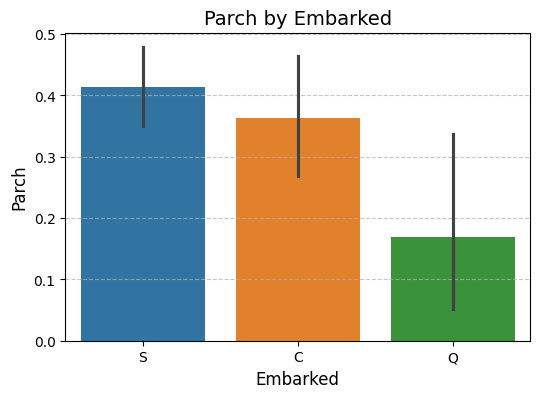

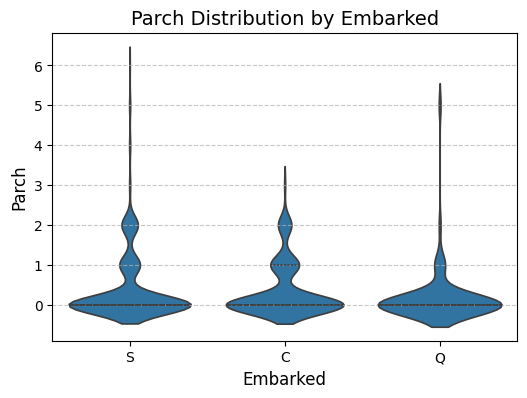

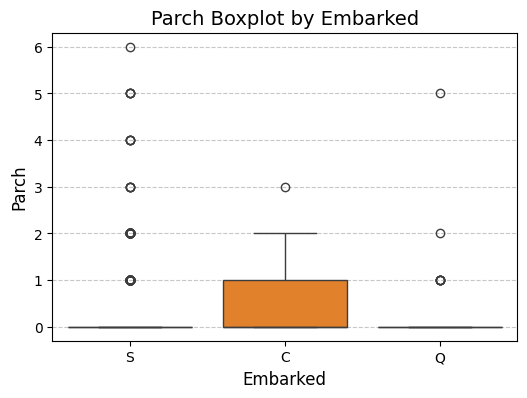

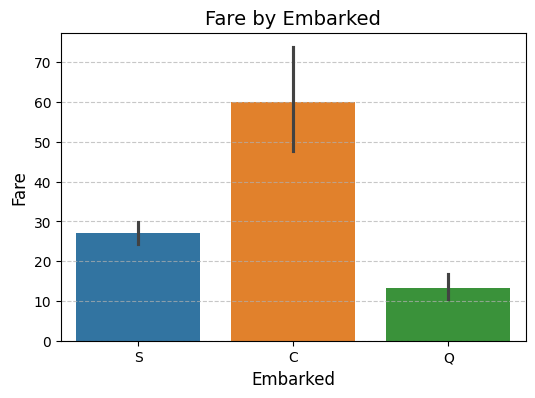

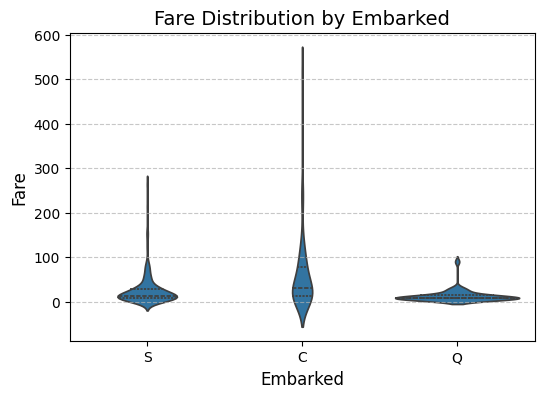

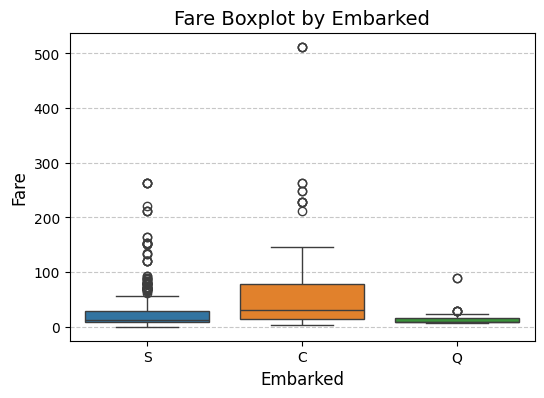

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================
# Load the dataset
# ==============================
file_path = '/content/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# ==============================
# Handle missing values
# ==============================
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# ==============================
# Convert data types
# ==============================
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# ===================================================
# 1. Correlation Matrix
# ===================================================
plt.figure(figsize=(8, 6))
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Matrix of Titanic Dataset', fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)
plt.show()

# ===================================================
# 2. Scatter Plots for Continuous Variables
# ===================================================
numerical_cols = df.select_dtypes(include='number').columns
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(
            x=numerical_cols[i],
            y=numerical_cols[j],
            hue='Survived',
            data=df,
            palette='Set2',
            s=70,
            edgecolor='black'
        )
        plt.title(f'{numerical_cols[i]} vs {numerical_cols[j]} (Colored by Survival)', fontsize=14)
        plt.xlabel(numerical_cols[i], fontsize=12)
        plt.ylabel(numerical_cols[j], fontsize=12)
        plt.legend(title='Survived', labels=['No', 'Yes'], fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

# ===================================================
# 3. Bar Plots, Violin Plots, and Box Plots
# ===================================================
categorical_cols = df.select_dtypes(include='object').columns

# Filter out irrelevant columns
excluded_cols = ['Name', 'Ticket', 'Cabin']
categorical_cols = [col for col in categorical_cols if col not in excluded_cols]

for cat_col in categorical_cols:
    for num_col in numerical_cols:
        # Bar Plot
        plt.figure(figsize=(6, 4))
        sns.barplot(
            x=cat_col,
            y=num_col,
            data=df,
            hue=cat_col,  # ✅ Fix: Added hue to remove warning
            legend=False  # ✅ Fix: Remove legend if not needed
        )
        plt.title(f'{num_col} by {cat_col}', fontsize=14)
        plt.xlabel(cat_col, fontsize=12)
        plt.ylabel(num_col, fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        # Violin Plot
        plt.figure(figsize=(6, 4))
        sns.violinplot(
            x=cat_col,
            y=num_col,
            data=df,
            inner='quartile',
            palette=None  # ✅ Fix: Remove palette if no hue is needed
        )
        plt.title(f'{num_col} Distribution by {cat_col}', fontsize=14)
        plt.xlabel(cat_col, fontsize=12)
        plt.ylabel(num_col, fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        # Box Plot
        plt.figure(figsize=(6, 4))
        sns.boxplot(
            x=cat_col,
            y=num_col,
            data=df,
            hue=cat_col,  # ✅ Fix: Added hue to remove warning
            legend=False  # ✅ Fix: Remove legend if not needed
        )
        plt.title(f'{num_col} Boxplot by {cat_col}', fontsize=14)
        plt.xlabel(cat_col, fontsize=12)
        plt.ylabel(num_col, fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()


 Multivariate Analysis (Multiple Variables Exploration)

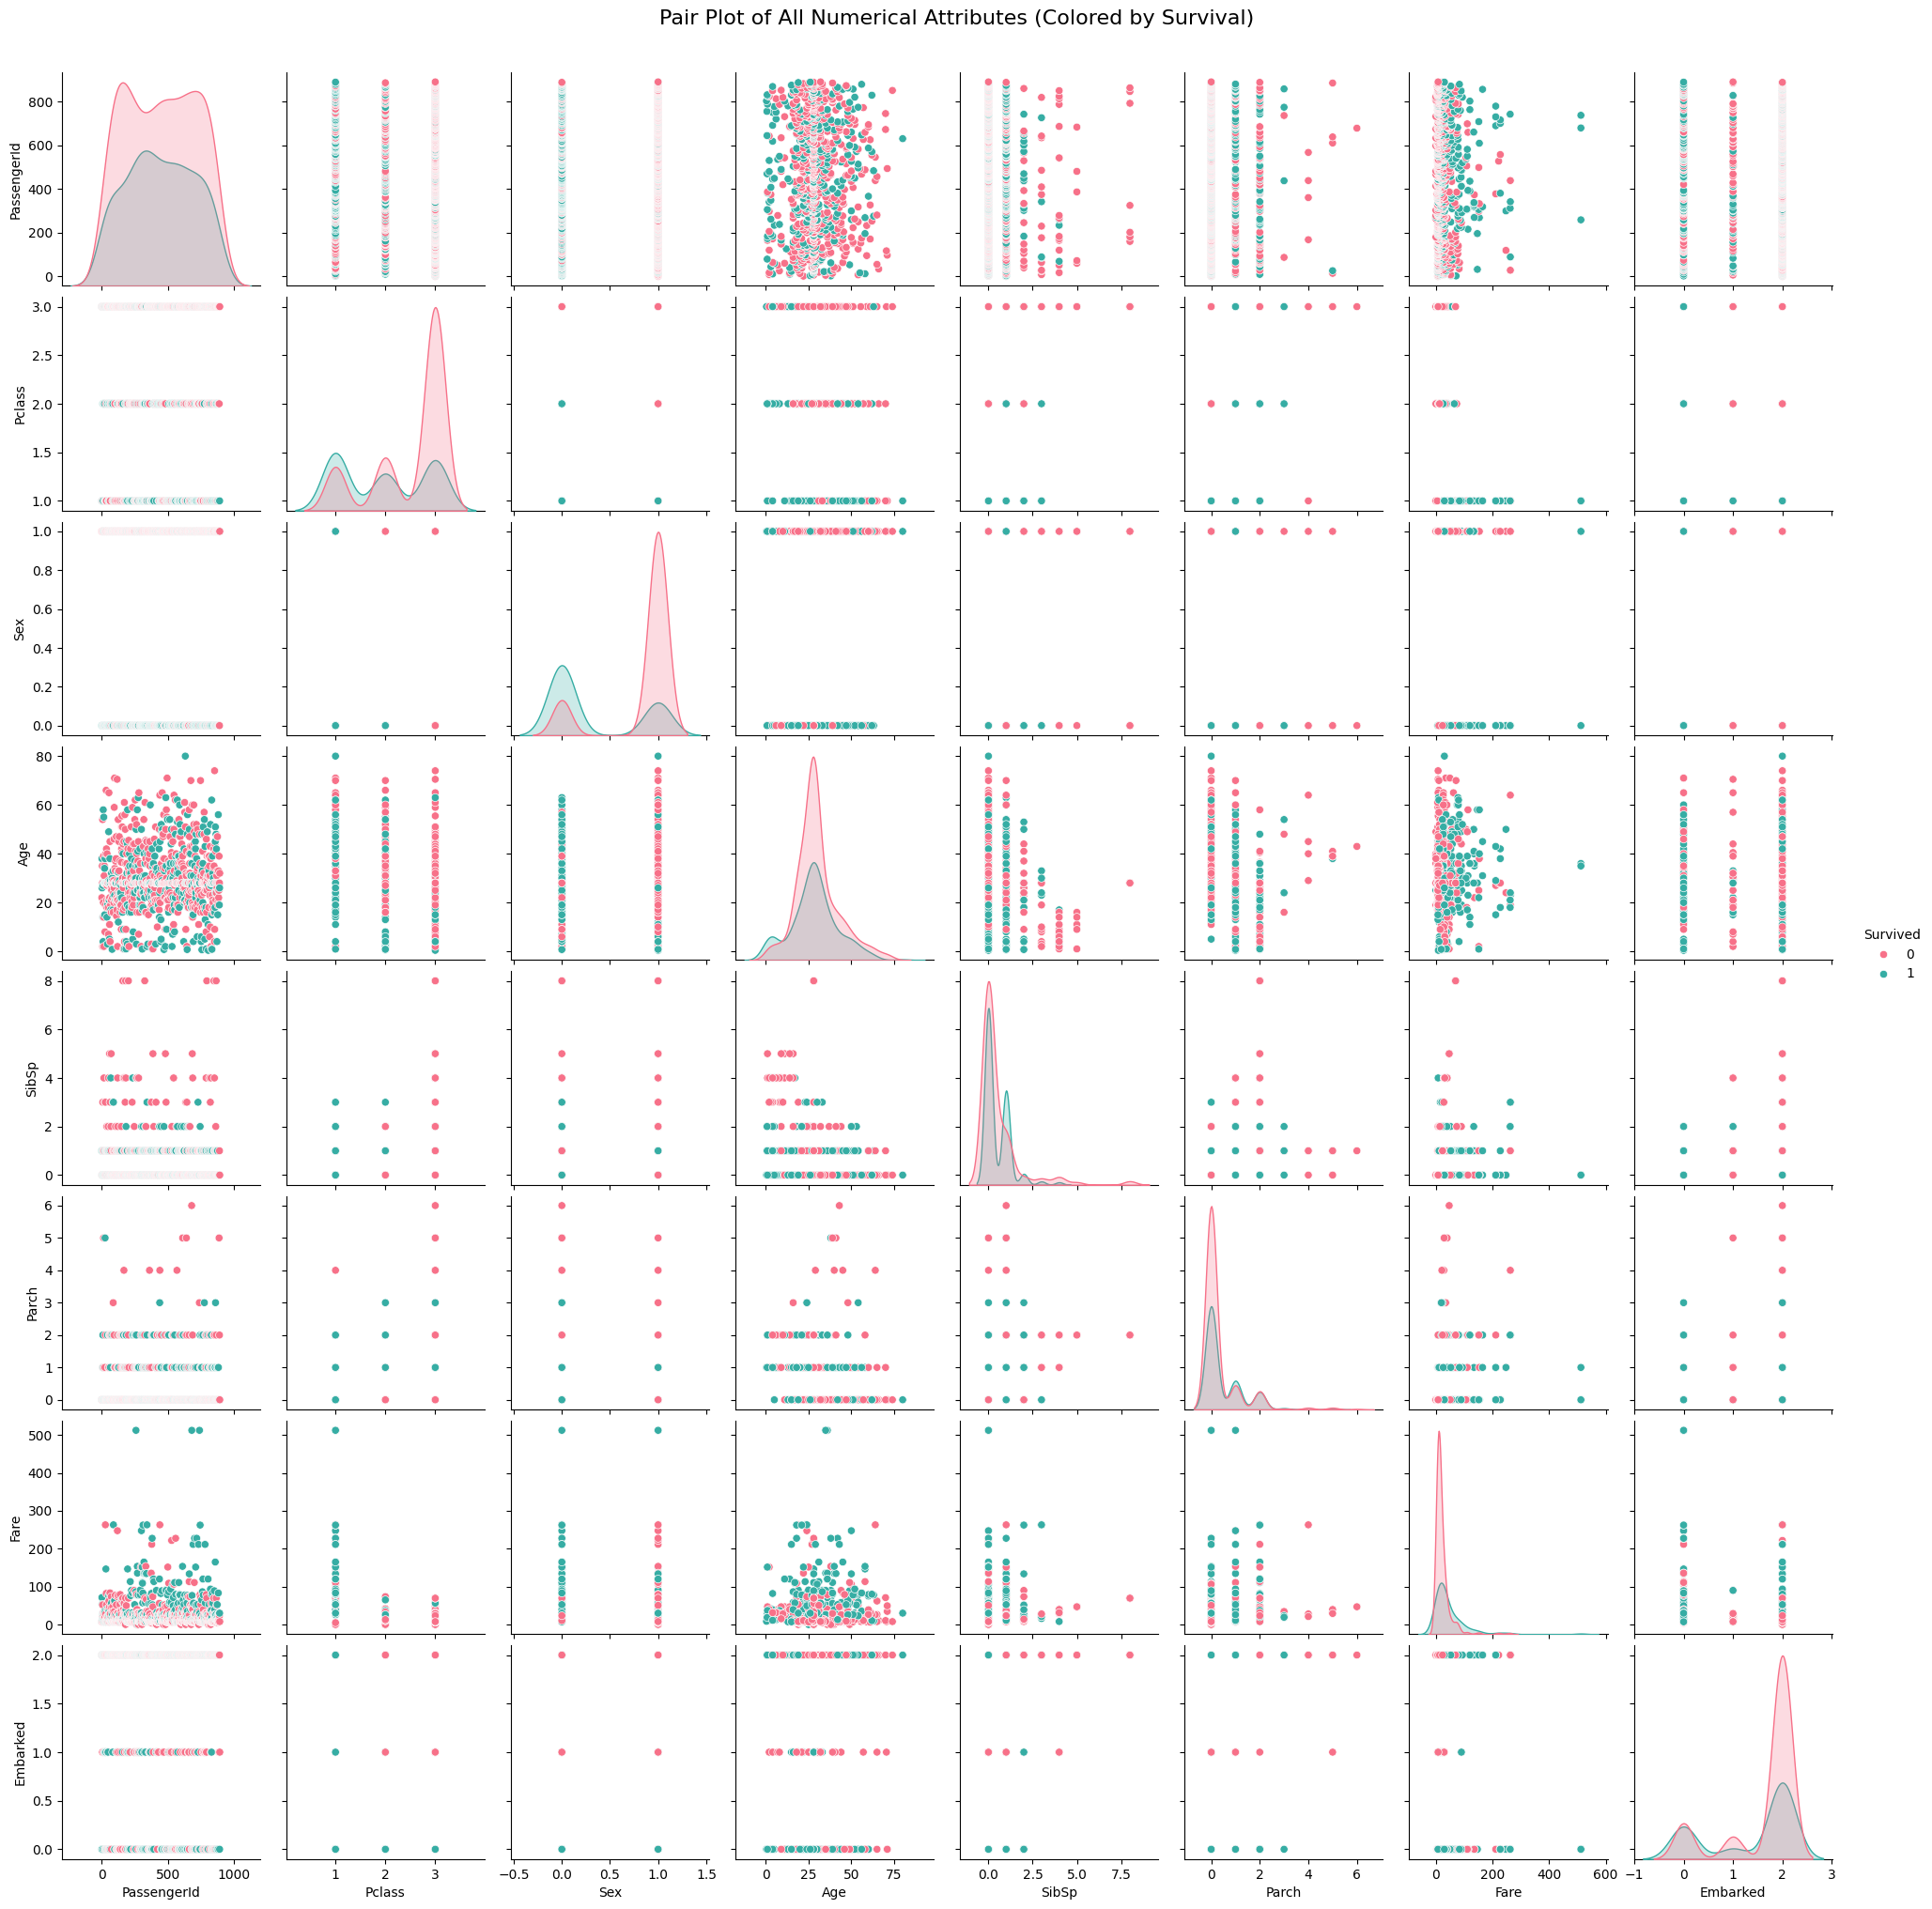

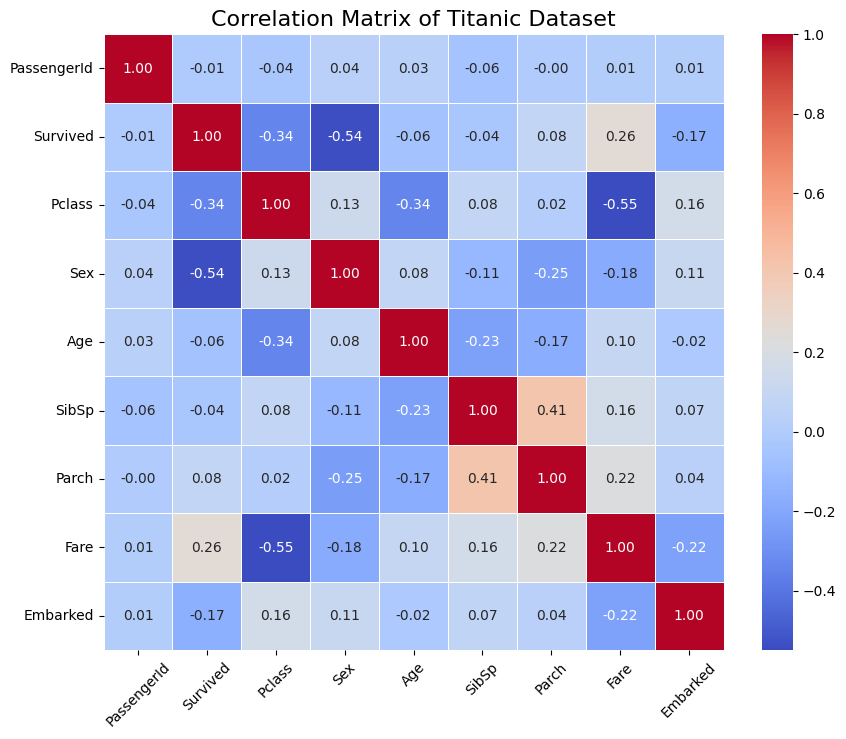

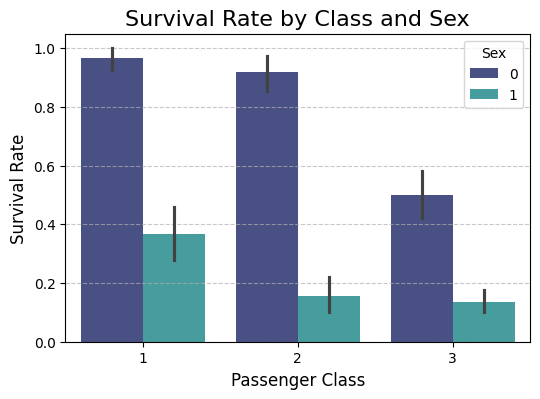

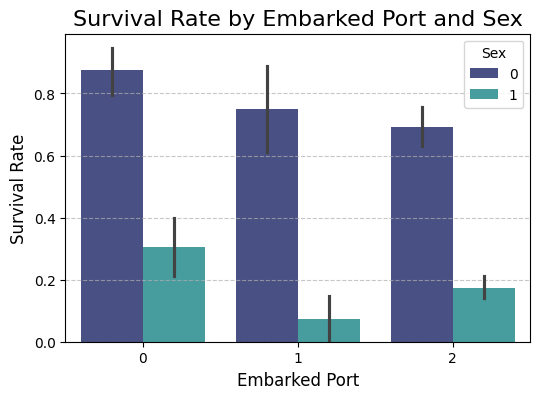

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================
# Load the dataset
# ==============================
file_path = '/content/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# ==============================
# Handle missing values
# ==============================
# Fill missing numerical values with median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Fill missing categorical values with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])

# ==============================
# Convert data types
# ==============================
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# ==============================
# Encode Categorical Variables
# ==============================
df['Sex'] = pd.Categorical(df['Sex']).codes
df['Embarked'] = pd.Categorical(df['Embarked']).codes

# ==============================
# Drop Irrelevant Columns
# ==============================
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# ===================================================
# 1. Pair Plot (Survived as Hue) - All Numeric Attributes
# ===================================================
sns.pairplot(
    df,
    hue='Survived',
    palette='husl',
    diag_kind='kde'
)
plt.suptitle('Pair Plot of All Numerical Attributes (Colored by Survival)', y=1.02, fontsize=16)
plt.show()

# ===================================================
# 2. Heatmap of Correlations - All Numerical Attributes
# ===================================================
plt.figure(figsize=(10, 8))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Matrix of Titanic Dataset', fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)
plt.show()

# ===================================================
# 3. Grouped Bar Plot - Survival Rate by Class, Sex, and Embarked
# ===================================================
# Pclass vs Survived by Sex
plt.figure(figsize=(6, 4))
sns.barplot(
    x='Pclass',
    y='Survived',
    hue='Sex',
    data=df,
    palette='mako'
)
plt.title('Survival Rate by Class and Sex', fontsize=16)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.legend(title='Sex', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Embarked vs Survived by Sex
plt.figure(figsize=(6, 4))
sns.barplot(
    x='Embarked',
    y='Survived',
    hue='Sex',
    data=df,
    palette='mako'
)
plt.title('Survival Rate by Embarked Port and Sex', fontsize=16)
plt.xlabel('Embarked Port', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.legend(title='Sex', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
